<center>
<h1>Fake news detection using graph neural network</h1>
<h2>SAGE GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import SAGEConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class SAGE(torch.nn.Module):
    
    
    def __init__(self, num_n_feature, num_g_feature, emb_size, num_layers=2):
        super(SAGE, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers):
            size_in = num_n_feature if i == 0 else emb_size
            self.convs.append(SAGEConv(size_in, emb_size))

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)


    
    def forward(self, x, edges_idx, batch_idx, g_features):
        for i, conv in enumerate(self.convs):
            x = conv(x, edges_idx)
            if i != len(self.convs) - 1:
                x = x.relu()
                x = F.dropout(x, p=0.5, training=self.training)
            else:
                
                flatten = torch.cat([global_mean_pool(x, batch_idx),
                                     global_max_pool(x, batch_idx)], axis=1)

                if g_features.size()[-1] > 1:
                    g_ft = self.lin_g(g_features)
                    flatten = torch.cat([flatten, g_ft], axis=1)

                out = self.act(self.out_layer(flatten))
                
        return out

# Training

In [4]:
models = train_all_and_optimize(SAGE, datasets, epochs = 60)

[I 2022-01-03 22:42:05,288] A new study created in memory with name: no-name-6ef033d5-860e-420f-940b-a9aa95b9c3bc


--> Train on: origin


[I 2022-01-03 22:42:35,606] Trial 0 finished with value: 0.8162530637254902 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8162530637254902.
[I 2022-01-03 22:43:19,684] Trial 1 finished with value: 0.8073299632352942 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8162530637254902.
[I 2022-01-03 22:44:25,834] Trial 2 finished with value: 0.8795955882352942 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 160}. Best is trial 2 with value: 0.8795955882352942.
[I 2022-01-03 22:45:34,807] Trial 3 finished with value: 0.6329656862745098 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 2 with value: 0.8795955882352942.
[I 2022-01-03 22:46:02,674] Trial 4 finished with value: 

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.24045587910546196  loss_val=0.5633790612220764 | acc_train=0.893484477124183  acc_val=0.7583639705882353
Epochs: 20 | loss_train=0.17193284382422766  loss_val=0.2667556285858154 | acc_train=0.9420445261437909  acc_val=0.8991727941176471
Epochs: 30 | loss_train=0.14670791973670325  loss_val=0.15150047242641448 | acc_train=0.9412785947712418  acc_val=0.9425551470588236
Epochs: 40 | loss_train=0.13550446099705166  loss_val=0.1782907396554947 | acc_train=0.9535334967320261  acc_val=0.9342830882352942
Epochs: 50 | loss_train=0.13623305492930943  loss_val=0.19588316082954407 | acc_train=0.9490910947712418  acc_val=0.9319852941176471
Epochs: 60 | loss_train=0.12101349896854824  loss_val=0.1188177838921547 | acc_train=0.9628778594771242  acc_val=0.959375


[I 2022-01-03 22:53:58,073] A new study created in memory with name: no-name-7959ec8d-e644-4ba6-89b8-8e8b46922325


--> Train on: dataset1


[I 2022-01-03 22:54:32,059] Trial 0 finished with value: 0.6096622242647058 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.6096622242647058.
[I 2022-01-03 22:55:27,656] Trial 1 finished with value: 0.8214613970588235 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.8214613970588235.
[I 2022-01-03 22:56:18,700] Trial 2 finished with value: 0.5674977022058824 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8214613970588235.
[I 2022-01-03 22:57:42,331] Trial 3 finished with value: 0.5762867647058824 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 160}. Best is trial 1 with value: 0.8214613970588235.
[I 2022-01-03 22:58:22,536] Trial 4 finished with value: 

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.721787240770128  loss_val=1.5298557519912719 | acc_train=0.7678206699346405  acc_val=0.7302389705882353
Epochs: 20 | loss_train=0.46466561489635044  loss_val=0.9093629837036132 | acc_train=0.8205678104575163  acc_val=0.5931066176470589
Epochs: 30 | loss_train=0.4192582501305474  loss_val=0.4327524840831757 | acc_train=0.8379289215686274  acc_val=0.8216911764705882
Epochs: 40 | loss_train=0.6282458172904121  loss_val=0.5235055685043335 | acc_train=0.7982026143790849  acc_val=0.7733455882352941
Epochs: 50 | loss_train=0.3565044667985704  loss_val=0.6837562799453736 | acc_train=0.8698427287581699  acc_val=0.8440257352941176
Epochs: 60 | loss_train=0.34804564548863304  loss_val=0.3661461710929871 | acc_train=0.862796160130719  acc_val=0.8745404411764707


[I 2022-01-03 23:06:32,064] A new study created in memory with name: no-name-ed1b92b6-a2f9-4b98-8bd8-aee6977dcb8e


--> Train on: dataset2


[I 2022-01-03 23:07:33,843] Trial 0 finished with value: 0.6740579044117647 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.6740579044117647.
[I 2022-01-03 23:08:20,954] Trial 1 finished with value: 0.8363970588235294 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8363970588235294.
[I 2022-01-03 23:09:16,659] Trial 2 finished with value: 0.69921875 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.8363970588235294.
[I 2022-01-03 23:09:50,757] Trial 3 finished with value: 0.8299057904411764 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 1 with value: 0.8363970588235294.
[I 2022-01-03 23:10:30,760] Trial 4 finished with value: 0.8232996323

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.5994257748126983  loss_val=0.5236769715944926 | acc_train=0.7832261029411764  acc_val=0.8018535539215685
Epochs: 20 | loss_train=0.4282511234283447  loss_val=0.4507751663525899 | acc_train=0.8250459558823529  acc_val=0.8115808823529411
Epochs: 30 | loss_train=0.3972694933414459  loss_val=0.3709048231442769 | acc_train=0.8414522058823529  acc_val=0.8291973039215685
Epochs: 40 | loss_train=0.3878828227519989  loss_val=0.44532819588979083 | acc_train=0.8328584558823529  acc_val=0.8259037990196078
Epochs: 50 | loss_train=0.3320938587188721  loss_val=0.4856743812561035 | acc_train=0.8678768382352942  acc_val=0.8291973039215685
Epochs: 60 | loss_train=0.3289260149002075  loss_val=0.34615206718444824 | acc_train=0.8696231617647058  acc_val=0.8788296568627452


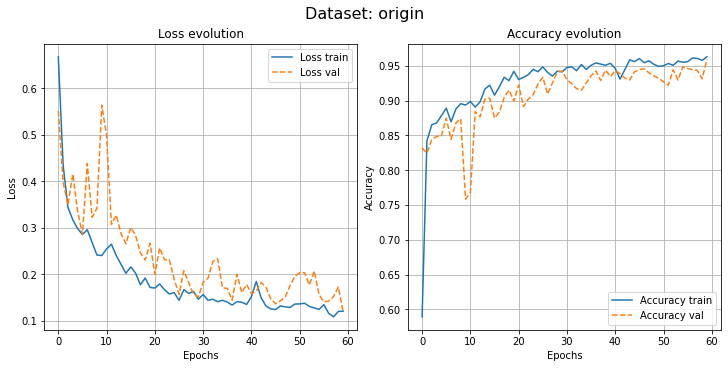

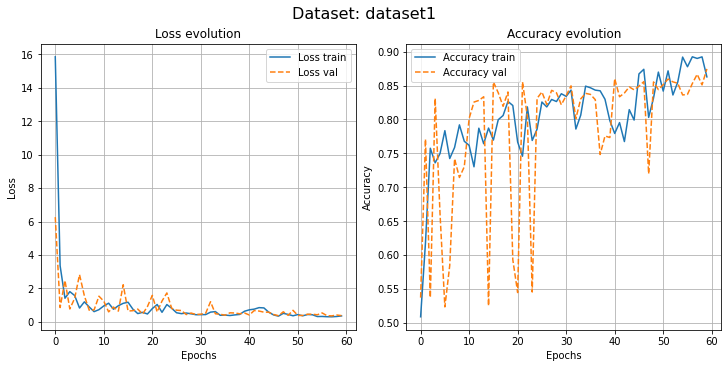

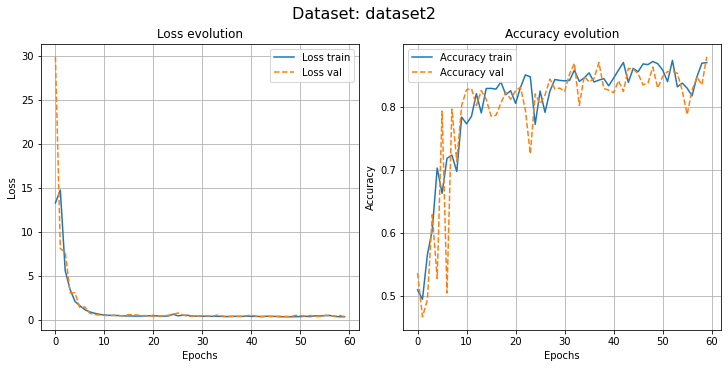

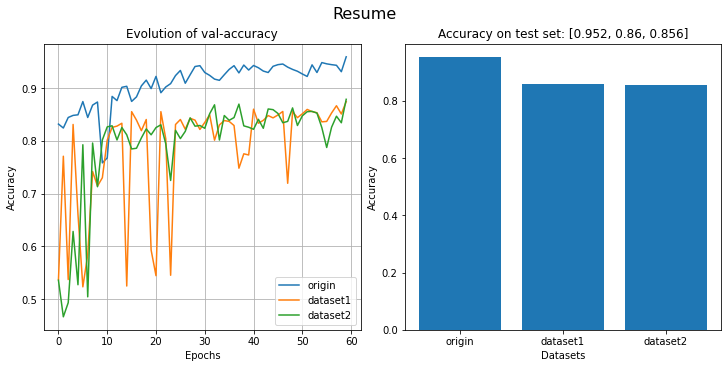

In [5]:
plot_hist(models)

# Save the three models

In [9]:
path = '../models/SAGE/'
for name, model, _, _ in models:
    torch.save(model, f'{path}SAGE_{name}')